<a href="https://colab.research.google.com/github/ngzhankang/finalYearProjectUOB/blob/main/NLP_VDCNN_Multilabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL YEAR PROJECT - VDCNN MULTILABEL
Done by : 
- P1935785 Ang Yak Hng
- P1932964 Teo Swee Hong Winson
- P1935727 Ng Zhan Kang
- P1935488 Triston Loh
- P1935602 Ng Ao Yang

Class of DIT/FT/3A/05


---
---

# 1.Cloning Github To Colab Workspace

<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> The entire section 1 is dedicated to users who are using google colab to do the entire project. This entire process clones the private repository directly into the temporary google colab workspace. Google colab user are to repeat this same proccess whenever in a new session. Users who do not use colab to do this project CAN OMIT THE ENTIRE SECTION 1. 
</div>

### 1.1. Configurating SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.

Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:GiOHgEv6kXoGvarJ6Q2+ycHQbzG2YjuPW3unELB7W0Y root@7925709dfe77
The key's randomart image is:
+---[RSA 4096]----+
|                 |
| .               |
|..o              |
|o+ = .           |
|= * B E S        |
|o+ * O +         |
|.+O B +          |
|+*BB *. .        |
|*O==+..o         |
+----[SHA256]-----+


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> When prompted for a set of informations such as "Enter a file in which to save the key...", please press enter and DO NOT type in anything.
</div>

In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts


# github.com:22 SSH-2.0-babeld-728b22c0


In [ ]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQDSINoW0mx9gHxu0x0m+pfejY/LVXjjSoaleW3ID0YqCcvTmeE1zzqOyokLPvVpxjwBvYKHSaLfzniL0jYiZxYRA3OinTqHqpbztRe1LHulZVtCH4xc9P6caZcakgjroXPgykrhXQOo6bStDmX2CJ0QweZKqHQ0TnQiS2DR77EhXF/YJSXYa4Etk+BfcNAeliMPghuc64bfxiCLvy/WKLohTOUMr02/sfzHICBdxR/YUMMCWscGMLh43HgdfiPFGI7lzjWjdsGXAxNpFtTmBBhVTMuiTqrwYyDwktYvkBbwYOuNcTUCgIi3ZoOcgC/FBR5AAGgKKGDkhSyx7pKCzvEHCrl+ahPPyiEjc7UgnUk3u4R8bkisRIqbu5D8VrmB04M61hHiMdEG0PSnFNl/tho07LmURnnClauMl67F0O/+Vds58wbqomipSAASyxJuWfkt382wRD3upcdBCfXxLJz7DoiUvnM7jgCsKiCPccKyBEFwUypU0xa53Kg0hwm6JlpvtTUvujILOS/yTMFUyCNZK+hwO81lbsC8D92tVSGSNH7QgRwvJJeNXfFHC4IXed/KWsS8Po9jhhUev01GlKDpX72MgmDE5Kto2UGdz/YLUrp8rPeK0Wdv0TWo4P73BVYpVjtCUh9MujplgPSF7oRiqYlzQTpvxLEcrfIHxngxPQ== root@7925709dfe77


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> After the key has been generated, please copy the entire key. Navigate to your Github Account > Profile Picture > Settings > SSH and GPG keys > New SSH Keys. Paste the generated key into the blank and lable it for your own convenience.
</div>

### 1.2. Testing SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!ssh -T git@github.com

Hi ngzhankang! You've successfully authenticated, but GitHub does not provide shell access.


### 1.3. Clone Private Repository

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!git clone git@github.com:ngzhankang/finalYearProjectUOB.git

Cloning into 'finalYearProjectUOB'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 292 (delta 19), reused 31 (delta 11), pack-reused 246
Receiving objects: 100% (292/292), 266.14 MiB | 20.79 MiB/s, done.
Resolving deltas: 100% (114/114), done.
Checking out files: 100% (31/31), done.


---
---

# 2.Data Importing

### 2.1. Load the libraries

---

Load the necessary libraries for usage in the entire project.

In [1]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


### 2.2. Check CUDA Version

---

We need to check the cuda version to download the correct version of spaCy for this application.

In [2]:
# suppress future warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# install necessary libraries that might not be found
!pip install -U spacy
!python -m spacy validate
!pip install -U pip setuptools wheel
!pip install -U spacy[cuda110,transformers,lookups]
!python -m spacy download en_core_web_lg
!pip install tensorflow_addons

# check versions of libraries we are going to use
%tensorflow_version 2.x
import os
import tensorflow
import tensorflow_addons as tfa
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import spacy
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Tensorflow version={}".format(tensorflow.__version__))
print("Tensorflow_addons version={}".format(tfa.__version__))
print("Keras version={}".format(tensorflow.keras.__version__))
print("Sklearn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("SpaCy version={}".format(spacy.__version__))
print("Python version={}".format(platform.python_version()))

     |████████████████████████████████| 12.8MB 435kB/s 
     |████████████████████████████████| 624kB 30.6MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 9.1MB 37.0MB/s 
     |████████████████████████████████| 460kB 32.5MB/s 
     |████████████████████████████████| 122kB 40.9MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107107 sha256=6d12e796cb5037d63e050ad8cf8809f1c5118e59bfd94d84073959b3ff0c95f0
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found e

### 2.3. Load the modules

---

Load the necessary modules for usage in the entire project.

In [4]:
# importing necessary modules for this project
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import spacy

# activate the GPU to run spaCy with GPU
spacy.prefer_gpu()

%matplotlib inline

### 2.4. Load the dataset

---

Load the dataset for usage in the entire project.

In [5]:
# use pandas to read the excel file and populate it in a pandas dataframe
companies = pd.read_excel('./clean_dataset.xlsx')

# see the top 10 companies that are populated in the dataframe
companies.head(10)

,Company_ID,Company,Country,PIC,Sector,Subsector,Archetype,Valuechain,Websites,Company Profile Information,Remarks
0,4137190062363536,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,NaN,TMT,media,media_aggregator/distributor,Midstream,https://getlinks.co/6831,For over 80 years of experience in creating an...,NaN
1,23248790229909748,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://baike.baidu.com/item/%E4%B8%9C%E8%8E%9...,Yatai's main products cover various cleaning m...,NaN
2,28486505934571008,EXIS TECH SDN. BHD.,MALAYSIA,NaN,oos,others,others,NaN,http://www.exis-tech.com/,"In the beginning, it started off by providing ...",NaN
3,38251695094669872,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39910921263510776,Aztech Electronics Pte Ltd,SINGAPORE,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://www.aztech.com/business/about-us/,"Being a turnkey, one-stop integrated solutions...",NaN
5,54863889264716592,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,NaN,tmt,it_services,it_services,midstream,https://www.tongdun.net/info/company,Tongdun Technology is a professional third-par...,NaN
6,60624700618157752,EMASTIGA ENGRG PTE LTD,SINGAPORE,NaN,cni,cni_service providers,cni_service providers,midstream,http://emastiga.com/,"For over 30 years, EMASTIGA has been servicing...",Holding company and also provides it_services....
7,102285011598298000,"AEROFLUID CO.,LTD.",THAILAND,NaN,CNI,cni_equipment suppliers,cni_equipment suppliers,MIDSTREAM,https://www.matchlink.asia/business/page/Thail...,Sales of hydraulic equipment and parts,NaN
8,116707715618748400,POLYCOM ASIA PACIFIC PTE. LTD.,SINGAPORE,NaN,tmt,telecommunication,network equipment supplier,upstream,https://www.sgpbusiness.com/company/Polycom-As...,WHOLESALE OF TELECOMMUNICATIONS EQUIPMENT (EXC...,NaN
9,120313950904532592,EXCELKOS SDN. BHD.,MALAYSIA,NaN,IND,diversified,rubber,Manufacturer,https://www.excelkos.com/,"For Excelkos, it all started with a far-sighte...",NaN


---
---

# 3.Exploratory Data Analysis

### 3.1. Get overview of dataset

---

Get statistical information of the dataset to understand the dataset better.

In [6]:
# see the row headers of the entire pandas dataframe first
list(companies.columns)

['Company_ID',
 'Company',
 'Country',
 'PIC',
 'Sector',
 'Subsector',
 'Archetype',
 'Valuechain',
 'Websites',
 'Company Profile Information',
 'Remarks']

In [7]:
# get the total number of records in the dataframe
df_count = companies['Company_ID'].count()

# get count of unique contries where companies are based in
df_countCountry = companies['Country'].nunique()

# get count of total unique sectors where companies are from
df_countSector = companies['Sector'].nunique()

# get count of total unique subseector where companies are from
df_countsubSector = companies['Subsector'].nunique()

# get count of total unique valuechain where companies are from
df_countValuechain = companies['Valuechain'].nunique()

# get count of total unique archetypes
df_countArchetype = companies['Archetype'].nunique()

print('Total number of records:', df_count)
print('Total number of countries:', df_countCountry)
print('Total number of sectors:', df_countSector)
print('Total number of subsectors:', df_countsubSector)
print('Total number of valuechain:', df_countValuechain)
print('Total number of archetypes:', df_countArchetype)

Total number of records: 5000
Total number of countries: 11
Total number of sectors: 14
Total number of subsectors: 35
Total number of valuechain: 20
Total number of archetypes: 93


In [8]:
# get total number of countries
df_totalCountries = companies['Country'].value_counts()

# get list of unique sector
df_sector = companies['Sector'].value_counts()

# get list of unique archetype
df_archetype = companies['Archetype'].value_counts()

# get list of unique valuechain
df_valuechain = companies['Valuechain'].value_counts()

print('List of unique countries:\n{}'.format(df_totalCountries))
print()
print('List of unique sector:\n{}'.format(df_sector))
print()
print('List of unique valuechain:\n{}'.format(df_valuechain))

List of unique countries:
SINGAPORE         1727
MALAYSIA          1226
THAILAND           998
CHINA              512
INDONESIA          271
HONG KONG          258
VIETNAM              4
TAIWAN               1
UNITED KINGDOM       1
LABUAN               1
AUSTRALIA            1
Name: Country, dtype: int64

List of unique sector:
CNI    880
OOS    877
CG     440
IND    428
REH    424
ONG    341
TMT    339
cni    291
tmt    257
ong     97
oos     97
ind     21
cg      15
reh      6
Name: Sector, dtype: int64

List of unique valuechain:
MIDSTREAM                 847
Downstream                632
midstream                 373
Midstream                 349
                          304
DOWNSTREAM                302
downstream                232
Manufacturer              127
UPSTREAM                  122
Upstream                   94
Trader                     88
Upstream or Downstream     82
distributor                81
Across value chain         60
upstream                   51
upstream o

In [9]:
# get list of unique subsector
df_subsector = companies['Subsector'].value_counts()

print('List of unique Subsector:\n{}'.format(df_subsector))

List of unique Subsector:
others                               974
building_material                    475
buildings & industrial               343
retail n distribution                303
consumer electronics                 235
auto & mec                           234
petrochemical                        218
metals and mining                    168
cni_service providers                156
residential                          146
it_services                          114
utilities                            108
restaurants, catering & services     106
o&g                                  106
semiconductor                         92
o&g_service providers/contractors     90
fmcg                                  90
telecommunication                     69
mixed                                 66
infrastructure                        59
media                                 57
commercial                            50
diversified                           46
hotels and accommodation       

In [10]:
print('List of unique archetype:\n{}'.format(df_archetype))

List of unique archetype:
others                                974
building_material_manufacturer        324
buildings & industrial_contractor     309
consumer discretionary distributor    191
consumer electronics_distributor      183
                                     ... 
building material_manufacturer          1
metals and mining                       1
hotels and accommodation_developer      1
tisp – fiber cable                      1
industrial gas                          1
Name: Archetype, Length: 93, dtype: int64


### 3.2. Drop unncessary columns

---

Here, we will drop columns that wiill not aid in our EDA.

In [11]:
# declare the list of the row names that are redundant
rows_to_drop = ['Company_ID', 'PIC', 'Websites', 'Remarks']

# use a conditional expression to filter out those rows
df_filteredCompanies = companies.drop(labels=rows_to_drop, axis=1)

df_filteredCompanies

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,For over 80 years of experience in creating an...
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,Yatai's main products cover various cleaning m...
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing ..."
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions..."
...,...,...,...,...,...,...,...
4995,SHENGYA (SG) PTE. LTD.,SINGAPORE,OOS,others,others,NaN,OTHER INFORMATION SERVICE ACTIVITIES N.E.C.
4996,"HUBEI HONG MAO SLAG POWDER CO., LTD.",CHINA,NaN,NaN,NaN,NaN,NaN
4997,ADAMPAK (THAILAND) LTD.,THAILAND,OOS,others,others,NaN,Known for our high quality products and dynami...
4998,HOE LEONG CRAWLER PARTS PTE. LTD.,SINGAPORE,OOS,others,others,NaN,WHOLESALE TRADE OF A VARIETY OF GOODS WITHOUT ...


### 3.3. Filter rows with valid data

---

Extract columns with Nan values and list them out here. Afterwards, gather the rows deemed suitable to process NLP.

In [12]:
# find all the rows with nan data in sector, subsector, archetype and valuechain
cols_to_check = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']
empty = df_filteredCompanies[df_filteredCompanies[cols_to_check].isnull().all(1)]

empty

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
13,"CHANGTU COUNTRY LONGXING FERTILIZER CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
35,"ZIBOBOSHANHONGLIWEI MOTOR CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
62,"BEIJING DUO MEIDUO SHIYOU PRODUCTS SALES CO., ...",CHINA,NaN,NaN,NaN,NaN,NaN
79,TRUSVEST SDN. BHD.,MALAYSIA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4947,"D.T.CONCRETE (CHIANGRAI) CO.,LTD.",THAILAND,NaN,NaN,NaN,NaN,NaN
4948,ABR (HK) LIMITED,HONG KONG,NaN,NaN,NaN,NaN,NaN
4951,"YAKESHI CHENG NEW TYPE WALL MATERIAL CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
4955,"HUAI AN CITY ZHENG HE TRADE CO.,",CHINA,NaN,NaN,NaN,NaN,NaN


In [13]:
# now we get the dataset that are valid
df_valid = pd.concat([df_filteredCompanies, empty, empty]).drop_duplicates(keep=False)

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,For over 80 years of experience in creating an...
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,Yatai's main products cover various cleaning m...
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing ..."
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions..."
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,Tongdun Technology is a professional third-par...
...,...,...,...,...,...,...,...
4994,KARYA MANIS SDN BHD,MALAYSIA,REH,residential,residential_developer,UPSTREAM,PROPERTY DEVELOPMENT
4995,SHENGYA (SG) PTE. LTD.,SINGAPORE,OOS,others,others,NaN,OTHER INFORMATION SERVICE ACTIVITIES N.E.C.
4997,ADAMPAK (THAILAND) LTD.,THAILAND,OOS,others,others,NaN,Known for our high quality products and dynami...
4998,HOE LEONG CRAWLER PARTS PTE. LTD.,SINGAPORE,OOS,others,others,NaN,WHOLESALE TRADE OF A VARIETY OF GOODS WITHOUT ...


In [14]:
# now we check the count of the total filtered dataset again
df_filterCount = df_valid['Company'].count()

print('Total number of filtered records:', df_filterCount)

Total number of filtered records: 4519


### 3.4. Get graphical overview of dataset

---

Get visualised information of the dataset to understand the dataset better.

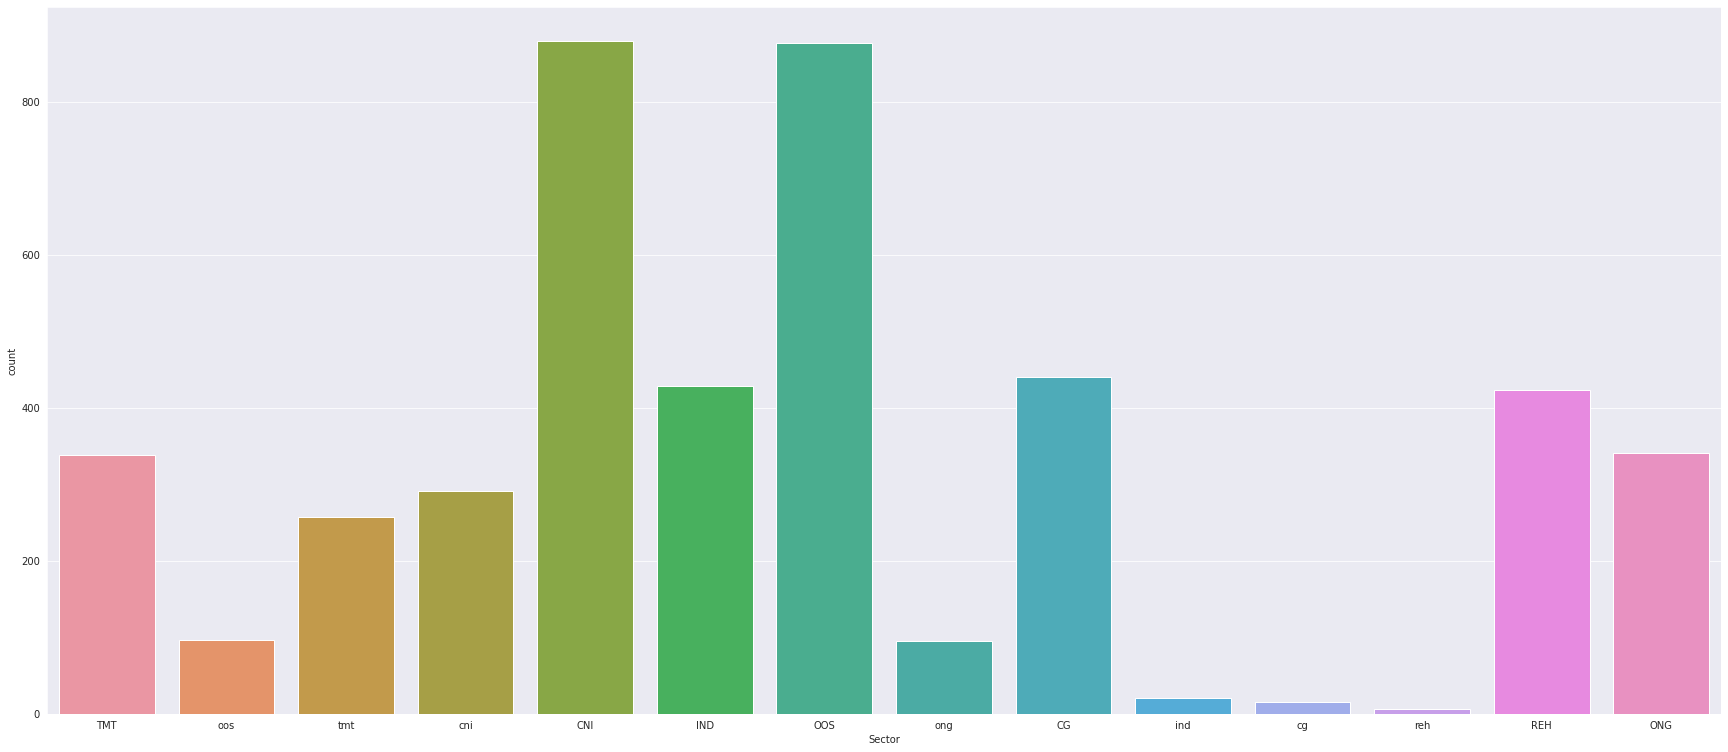

In [15]:
sns.set_style('darkgrid')
plt_dims = (30, 13)
fig, ax = plt.subplots(figsize=plt_dims)

# plot a barplot to see number of companies that belongs to specific sectors
sns.countplot(x="Sector", data=df_valid, ax=ax)
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies comes from the CNI(Construction And Infrastructure), with TMT(Technology, Media and Telecomm) sector.
</div>

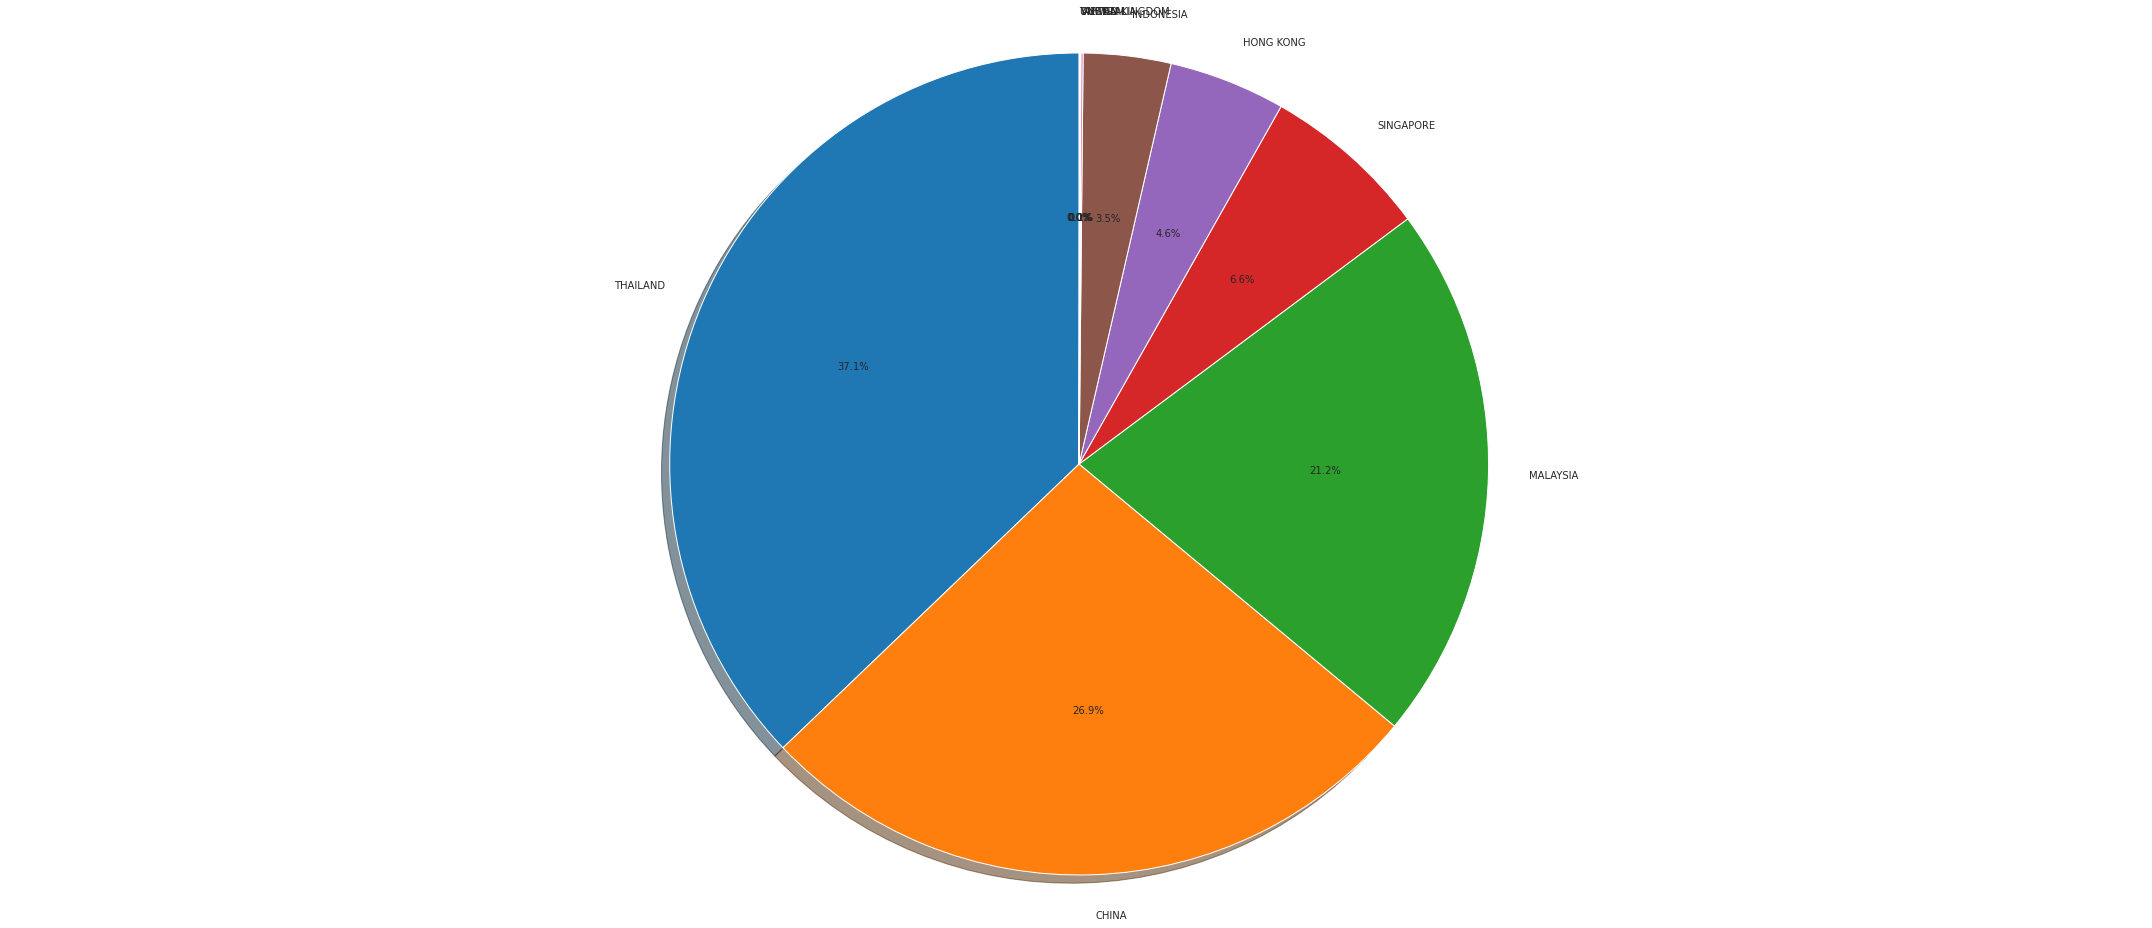

In [16]:
# Pie chart
labels = list(df_valid['Country'].unique())
sizes = list(df_valid['Country'].value_counts())

plt_dims = (30, 13)
fig1, ax1 = plt.subplots(figsize=plt_dims)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies are Singapre-Based companies, followed up by Hong Kong, Indonesia and so on.
</div>

### 3.5. See examples of company description

---

We would now like to see some examples of the company descriptions in order to undestand later how to preprocess them later on.

In [17]:
# configurate pandas dataframe to let us see the entire company description IN FULL
pd.set_option('display.max_colwidth', None)

# get the 1st 50 results and observe
df_valid.loc[0:49,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We do realise that some of the company profile message have some breaks in between like '\n'. Now, we will have to take away all these problems so that it is one string of paragraph with no such annotations in betweeen.
</div>

---
---

# 4.Data Preprocessing

### 4.1. Removing `\n`

---

Now, we will like to standardize all the paragraphs such that the are homogenous, before we tokenize the paragraph.

In [18]:
# get rid of the \n found in the respective descriptions
df_valid = df_valid.replace('\n',' ', regex=True)

### 4.2. Calculating the word length distribution

---

Here, we will be calculating the world length distribution of the collective company description.

In [19]:
# first, add in a new column that tabluates the length of the respecive company description
df_valid["length"] = df_valid["Company Profile Information"].str.len()
df_valid.head()

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238.0
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0


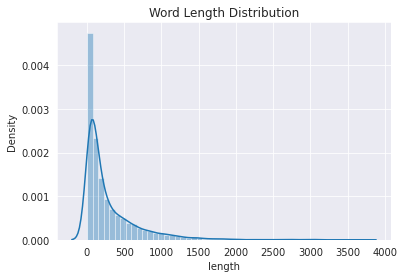

In [20]:
# now plot a distribution plot to see the word length distribution
sns.distplot(df_valid["length"], kde=True)
plt.title('Word Length Distribution')
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We can see that there is a high record of the company description having a total word length of around 200 to 300, while those about 800 is very rare.
</div>

### 4.3. Subsample from the entire dataset

---

We will now subsample a part of the dataset from the entire dataset. This is important as firstly, we need to ensure that our tokenization is working correctly in a smaller scale dataset, since using the entire dataset to do it will be very time consuming.

In [21]:
# declare sample size here first (CHANGE IT AS THE TRAINING DATA INCREASES)
sample_size = 350

# now we will get the data from the restricted range of sample size
subsample = df_valid[:sample_size]
subsample

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238.0
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0
...,...,...,...,...,...,...,...,...
366,SHOPEE HONG KONG LIMITED,HONG KONG,tmt,digital_business,digital_business,midstream,"Shopee is the leading e-commerce platform in Southeast Asia and Taiwan. It is a platform tailored for the region, providing customers with an easy, secure and fast online shopping experience through strong payment and logistical support. Shopee aims to continually enhance its platform and become the region’s e-commerce destination of choice. Shopee has a wide selection of product categories ranging from consumer electronics to home & living, health & beauty, baby & toys, fashion and fitness equipment. Shopee, a Sea company, was first launched in Singapore in 2015, and has since expanded its reach to Malaysia, Thailand, Taiwan, Indonesia, Vietnam and the Philippines. Sea is a leader in digital entertainment, e-commerce and digital financial services across Greater Southeast Asia. Sea’s mission is to better the lives of consumers and small businesses with technology, and is listed on the NYSE under the symbol SE.",924.0
367,M-LINK SYSTEM (M) SDN. BHD.,MALAYSIA,tmt,consumer electronics,consumer electronics_distributor,downstream,"Formed in 1989, and with the rapid growth, the company has incorporated in 1994 as M-LINK SYSTEM (M) SDN BHD, with its headquarter in Petaling Jaya, Selangor and 7 branches located at strategic and important network points of Malaysia. M-Link System (M) Sdn Bhd has forged

### 4.4. Populating Nan cells

---

We will now have to populate Nan cells with space so that we can carry on and process with text tokenization.

In [22]:
# fill na with space instead of others
df_valid.fillna(" " ,inplace=True)
df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593
...,...,...,...,...,...,...,...,...
4994,KARYA MANIS SDN BHD,MALAYSIA,REH,residential,residential_developer,UPSTREAM,PROPERTY DEVELOPMENT,20
4995,SHENGYA (SG) PTE. LTD.,SINGAPORE,OOS,others,others,,OTHER INFORMATION SERVICE ACTIVITIES N.E.C.,43
4997,ADAMPAK (THAILAND) LTD.,THAILAND,OOS,others,others,,"Known for our high quality products and dynamic service, we are a leading tape and label converter delivering premium solutions to a range of clients right across the globe.",174
4998,HOE LEONG CRAWLER PARTS PTE. LTD.,SINGAPORE,OOS,others,others,,WHOLESALE TRADE OF A VARIETY OF GOODS WITHOUT A DOMINANT PRODUCT,64


### 4.5. Assigning tags
---
In this section, we will be assigning tags to every row, so that we can make use of the given keywords for bag-of-words (BoW) processing.

In [23]:
# Programmatically assign tags to each definition
sector_keywords = pd.read_excel('./sector_master_definition.xlsx')
df_keywords = sector_keywords[['Sector', 'Subsector', 'Archetype', 'Value Chain', 'Sector Keywords']]

# capitalise all tags
df_keywords['Value Chain'] = df_keywords['Value Chain'].str.upper()
df_keywords.fillna(' ', inplace=True)
df_keywords['Sector Keywords'] = df_keywords['Sector Keywords'].str.upper()
df_keywords['Sector Keywords'].replace(' ', '[]', inplace=True)

# save unique tags, sorted for consistency across runs
sector = np.sort(df_keywords['Sector'].unique())
subsector = np.sort(df_keywords['Subsector'].unique())
archetype = np.sort(df_keywords['Archetype'].unique())
valuechain = np.sort(df_keywords['Value Chain'].unique())
print(len(sector), len(subsector), len(archetype), len(valuechain))
tag_counts = [len(sector), len(subsector), len(archetype), len(valuechain)]

# assign number tag list to each row
taglist = []
for index, row in df_keywords.iterrows():
    temp = []

    temp.append(np.where(sector == row['Sector'])[0][0])
    temp.append(np.where(subsector == row['Subsector'])[0][0])
    temp.append(np.where(archetype == row['Archetype'])[0][0])
    temp.append(np.where(valuechain == row['Value Chain'])[0][0])

    taglist.append(temp)

# assign completed taglist to column in dataframe
df_keywords['list_tag'] = taglist

7 32 92 9


In [24]:
# process data for homogenity
df_valid['Valuechain'] = df_valid['Valuechain'].str.split().str.join(' ')
df_valid['Valuechain'] = df_valid['Valuechain'].str.upper()
df_valid['Sector'] = df_valid['Sector'].str.upper()
df_valid['Valuechain'].replace('', ' ', inplace=True)

taglist_df = []
# process tags for records
for index, row in df_valid.iterrows():
    temp = []

    try: # for error handling
        temp.append(np.where(sector == row['Sector'])[0][0])
        temp.append(np.where(subsector == row['Subsector'])[0][0])
        temp.append(np.where(archetype == row['Archetype'])[0][0])
        temp.append(np.where(valuechain == row['Valuechain'])[0][0])

        taglist_df.append(temp)
    except:
        # drop data if not valid
        df_valid.drop(index, inplace=True)


df_valid['list_tag'] = taglist_df

df_valid.shape

(4502, 9)

In [25]:
# combine all keywords from all sectors
keywords_masterlist = []
for index, row in df_keywords.iterrows():
    keywords_masterlist += eval(row['Sector Keywords'])

# remove extraenous keywords, then sort
keywords_masterlist = sorted(list(set(keywords_masterlist)))
print(len(keywords_masterlist))

1474


### 4.6. Text Tokenization, Removing Stop Words, punctuations, numbers, stop words and Lower Case

---

Now we will start to tokenize the word after we have ensure that the text description between the company descriptions are homogenous. In this process, we will also process with stop words, punctuations, numeric figures, lower cap words and lemmatize words all using the spaCy API.

In [26]:
# we will have to ensure all the dtype of the respective columns are in string and not float for spacy to handle properly, so now we will attempt to convert all into strings
columns_to_convert = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']

for i in columns_to_convert:
  df_valid[i] = df_valid[i].astype(str)

Here we will do everything necessary to start up spacy for use in preprocessing the text.

In [27]:
# import required libraries 
from spacy.language import Language
from spacy.tokens import Doc
from spacy.lang.char_classes import ALPHA, ALPHA_LOWER, ALPHA_UPPER, CONCAT_QUOTES, LIST_ELLIPSES, LIST_ICONS
from spacy.util import compile_infix_regex

# initialise nlp engine
nlp = spacy.load("en_core_web_lg")

# declare custom properties
Doc.set_extension('processed', default=True, force=True)

# Modify tokenizer infix patterns
infixes = (
    LIST_ELLIPSES
    + LIST_ICONS
    + [
        r"(?<=[0-9])[+\-\*^](?=[0-9-])",
        r"(?<=[{al}{q}])\.(?=[{au}{q}])".format(
            al=ALPHA_LOWER, au=ALPHA_UPPER, q=CONCAT_QUOTES
        ),
        r"(?<=[{a}]),(?=[{a}])".format(a=ALPHA),
        r"(?<=[{a}0-9])[:<>=/](?=[{a}])".format(a=ALPHA),
    ]
)

infix_re = compile_infix_regex(infixes)
nlp.tokenizer.infix_finditer = infix_re.finditer

# custom retokenizer
@Language.component('custom_retokenizer')
def custom_retoken(doc):
    doc_text = doc.text.upper()
    doc_split = [i.text.upper() for i in doc]
    temp_kw = [i.lstrip().rstrip() for i in keywords_masterlist if len(i.lstrip().rstrip().split(' ')) > 1]
    for token in temp_kw:
        token_length = len(token.split(' '))
        token_split = token.split(' ')
        if token in doc_text and token_split[0] in doc_split:
            merge_pos = doc_split.index(token_split[0])
            with doc.retokenize() as retokenizer:
                try:
                    retokenizer.merge(doc[merge_pos:merge_pos + token_length], attrs={'LEMMA' : token.lower()})
                except:
                    print(merge_pos, merge_pos+token_length)

    return doc

# custom lemmatizer
@Language.component("custom_preprocess")
def custom_preprocess(doc):
    temp = []
    # filter through each token and add to preprocessed text if requirements met.
    for t in doc:
        if (not t.is_punct and not t.like_num and not t.is_stop and not t.is_digit and not (t.ent_type == 396 or t.ent_type == 397)):
            temp.append(t.lemma_.lower())

    temp = ' '.join(temp)
    doc._.processed = temp

    return doc

# add custom pipeline components to default pipeline
nlp.add_pipe('custom_retokenizer')
nlp.add_pipe('custom_preprocess', last=True)

<function __main__.custom_preprocess>

In [28]:
# run the pipeline on data
processed_doc = list(nlp.pipe(df_valid['Company Profile Information']))

3 5
95 97
3 5


In [29]:
# get a view of the entity visualizer
from spacy import displacy
displacy.render(processed_doc[4], style="ent", jupyter=True)

In [30]:
# add lemmatised words to dataframe
df_valid['processed'] = [doc._.processed for doc in processed_doc]

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,MIDSTREAM,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238,"[6, 18, 49, 5]",year experience create develop high-quality learning material enable provide world-class educational innovation meet need teacher student institution educational authority
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273,"[6, 8, 20, 3]",yatai main product cover cleaning machinery clean agent cleaning tool stone maintenance cleaning product clean solution service include product technical consultation product customization employee training maintenance
2,EXIS TECH SDN. BHD.,MALAYSIA,OOS,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344,"[4, 24, 64, 0]",beginning start provide technical support test handler move module design production in-house design full-fledged handler introduce company design produce wide range turret pick-and-place solution customer world
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524,"[6, 8, 20, 3]",turnkey one-stop integrated solution provider base singapore aztech equip state-of-the-art equipment r&d design manufacturing packaging capability deliver seamless unified experience time strive edge technology year build capability serve client manufacturing need include consumer electronics telecommunication healthtech led lighting automotive technology start-up market segment
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,TMT,it_services,it_services,MIDSTREAM,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593,"[6, 17, 46, 5]",tongdun technology professional third-party intelligent risk management decision-making service provider headquarter hangzhou zhejiang integrate artificial intelligence business scenario tongdun technology offer solution intelligent user analysis intelligent risk management intelligent antifraud intelligent operation client industry include financial industry int

### 4.7. Char2Vec

---

Here, we will use character embedding, as VDCNN is a character-based intern.

In [31]:
# randomise dataset first here
df_rand = df_valid.sample(frac=1)

In [32]:
df_rand.head(3)

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed
1676,SIN GHEE HUAT CORPORATION LTD,SINGAPORE,CNI,building_material,building_material_manufacturer,MIDSTREAM,"Our Mission & Values Vision Asia’s Strongest Stainless Steel Partner Mission We bring stainless steel to businesses everywhere, wherever they operate, and do it better than anyone else. We fulfil our brand mission by: Crafting seamless solutions for our clients Creating mutual, enduring value for all stakeholders and Maximising long-term returns to shareholders. Profile We hold a comprehensive range of stainless steel products in Singapore. From distribution to supply chain management, Sin Ghee Huat has almost everything you need in stainless steel. We are Sin Ghee Huat, Singapore’s stainless steel specialist. Founded on partnerships. Tempered by time. Trusted by generations. Be it in energy, construction or ship-building, We forge stainless steel solutions for industries that strengthen the world. Together, we believe in making the world stronger. Company Information Sin Ghee Huat Corporation Ltd is a public company listed on the main board of Singapore Exchange Securities Trading Limited. We have a track record of more than 40 years in the sales and distribution of stainless steel products. We hold a comprehensive range of more than 5,000 items of stainless steel products, with in depth product knowledge and solutions catering to the specific requirements of oil and gas, petrochemical, marine, construction, food processing and other industries. Our main warehousing facilities are housed at 62 Tuas Basin Link and 32 Gul Crescent in Singapore. With a comprehensive range of stainless steel and duplex products, we are able to serve our customers in diverse industries such as:",1615,"[1, 3, 8, 5]",mission values vision asia strongest stainless steel partner mission bring stainless steel business operate well fulfil brand mission craft seamless solution client create mutual endure value stakeholder maximise long-term return shareholder profile hold comprehensive range stainless steel product singapore distribution supply chain management sin ghee huat need stainless steel sin ghee huat singapore stainless steel specialist found partnership temper time trust generation energy construction ship-building forge stainless steel solution industry strengthen world believe make world strong company information sin ghee huat corporation ltd public company list main board singapore exchange securities trading limited track record year sale distribution stainless steel product hold comprehensive range item stainless steel product depth product knowledge solution cater specific requirement oil and gas petrochemical marine construction food processing industry main warehousing facility house tuas basin link gul crescent singapore comprehensive range stainless steel duplex product able serve customer diverse industry
284,"CHANG JUI FANG INDONESIA,PT",INDONESIA,CNI,building_material,building_material_supplier_distributor,DOWNSTREAM,"PT. Chang Jui Fang Indonesia (CJFI) since 1996 with its ATENA, PICASSO, KITA, HARMONY and MUSTIKA brand has been serving its customers to meet the needs of modern lifestyle through the products of floor tile, wall tile, and granite tile that always excells in quality, innovation, and affordable. With a modern production facility, area of more than 100 hectares, and 1000 skillful and dedicated workforces, CJFI now has been transformed into a well-known high quality floor and wall tile ceramic manufacturer and distributor that is taken into account in Indonesia. Moreover, CJFI for its ATENA, PICASSO, KITA, HARMONY and MUSTIKA brands, always ensures each process inline with International Quality Assurance Management System of ISO 9001:2015 and Product Quality System of SNI ISO 13006:2010. CJFI also has gained the product quality recognition from Indonesia National Standard (SNI) and also SIRIM as other sta

In [33]:
ALPHABET = 'abcdefghijklmnopqrstuvwxyz0123456789-,;.!?:’"/|_#$%ˆ&*˜‘+=<>()[]{} '
FEATURE_LEN = 1024 #maxlen as depicted in the papers

In [34]:
def get_char_dict():
    char_dict={}
    for i,c in enumerate(ALPHABET):
        char_dict[c]=i+1
    return char_dict

def char2vec(text, max_length=FEATURE_LEN):
    char_dict = get_char_dict()
    data=np.zeros(max_length)
    
    for i in range(0, len(text)):
        if i >= max_length:
            return data
        
        elif text[i] in char_dict:
            data[i] = char_dict[text[i]]
        
        else:
            data[i]=len(ALPHABET)

    return data

In [35]:
char2vec_vectors = []

for text in df_rand["processed"].fillna("NA").values:
  char2vec_vectors.append(char2vec(text))
data = np.array(char2vec_vectors)

In [36]:
data.shape

(4502, 1024)

---
---

# 5.Models
---
Here we will train the model that will help categorize each company.

### 5.1. Training Models

---

We shall commence training.

In [37]:
import keras

print('--- Version Checking ---')
print("Keras:", keras.__version__)

--- Version Checking ---
Keras: 2.5.0


In [38]:
# define one hot encode function
def one_hot(arr, n_cat):
    output = []
    for n in arr:
        result = np.zeros(n_cat)
        result[n] = 1

        output.append(result)

    return np.array(output, dtype=int)

In [39]:
from keras.preprocessing import sequence
distribution = int(df_rand.shape[0] * 0.9)

# split datasets to train and test and do a 90%, 10% split
X_train, X_test = data[:distribution], data[distribution:]
y_train, y_test = np.array(list(df_rand.iloc[:distribution]['list_tag'])), np.array(list(df_rand.iloc[distribution:]['list_tag']))

print(f'Train data shape: {X_train.shape}\nTest data shape: {X_test.shape}')

Train data shape: (4051, 1024)
Test data shape: (451, 1024)


In [40]:
print(f'Train data labels: {y_train.__len__()}\nTest data labels: {y_test.__len__()}')

Train data labels: 4051
Test data labels: 451


In [41]:
# since we are going to make use of multilabel classification, we need to split our data into the respective 4 classes

# names for the respective classes
label_names = ['sector', 'subsector', 'archetype', 'valuechain']

# First output
y1_train = one_hot(y_train[:,0], tag_counts[0])
y1_test =  one_hot(y_test[:,0], tag_counts[0])

# Second output
y2_train = one_hot(y_train[:,1], tag_counts[1])
y2_test =  one_hot(y_test[:,1], tag_counts[1])

# Third output
y3_train = one_hot(y_train[:,2], tag_counts[2])
y3_test =  one_hot(y_test[:,2], tag_counts[2])

# Fourth output
y4_train = one_hot(y_train[:,3], tag_counts[3])
y4_test =  one_hot(y_test[:,3], tag_counts[3])

y_train_multi = [y1_train, y2_train, y3_train, y4_train]
y_test_multi = [y1_test, y2_test, y3_test, y4_test]

# declare how we gonna print the loss for the respective classes
losses = {i : 'binary_crossentropy' for i in label_names}

In [42]:
# self-defined k max pooling layer (since keras does not offer)
from tensorflow.keras.layers import Flatten, Layer, InputSpec

class KMaxPooling(Layer):
    """
    K-max pooling layer that extracts the k-highest activations from a sequence (2nd dimension).
    TensorFlow backend.
    """
    def __init__(self, k=3, **kwargs):
        super().__init__(**kwargs)
        self.input_spec = InputSpec(ndim=3)
        self.k = k

    def compute_output_shape(self, input_shape):
        return (input_shape[0], (input_shape[2] * self.k))

    def call(self, inputs):

        # swap last two dimensions since top_k will be applied along the last dimension
        shifted_input = tf.transpose(inputs, [0, 2, 1])

        # extract top_k, returns two tensors [values, indices]
        top_k = tf.nn.top_k(shifted_input, k=self.k, sorted=True, name=None)[0]
        # top_k = tf.nn.top_k(shifted_input, k=self.k)[0]

        # return flattened output
        return Flatten()(top_k)

In [43]:
# convolutional block layer for 64 and 128 neurons
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv1D, Dense, Dropout, MaxPooling1D, GlobalAveragePooling1D, Input, Lambda, Embedding
from tensorflow.keras.layers import ReLU, BatchNormalization, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model

def convolutional_block(input_shape, num_filters):
  model = Sequential()

  # 1st conv layer
  model.add(Conv1D(filters=num_filters, kernel_size=3, strides=1, padding='same', input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(Activation("relu"))

  # 2nd conv layer
  model.add(Conv1D(filters=num_filters, kernel_size=3, strides=1, padding='same'))
  model.add(BatchNormalization())
  model.add(Activation("relu"))

  return model

In [44]:
# we need to define this function so that we can get the input shape to be fed to the conv blocks
def conv_shape(conv):
  return conv.get_shape().as_list()[1:]

In [45]:
# we need to get the length of the keywords for a individual list
len(keywords_masterlist)

1474

In [46]:
from tensorflow.keras.layers import ReLU

def multi_branch(x, name, output_dim):
  
  # 1st layer temp conv(64)
  x = Conv1D(filters=64, kernel_size=3, strides=2, padding='same')(x)
  
  # 2nd + 3rd layer convblock(64) * 2
  x = convolutional_block(conv_shape(x), num_filters[0])(x)
  x = convolutional_block(conv_shape(x), num_filters[0])(x)

  # 4th layer pool/2
  x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)

  # 5th + 6th layer convblock(128) * 2
  x = convolutional_block(conv_shape(x), num_filters[1])(x)
  x = convolutional_block(conv_shape(x), num_filters[1])(x)

  # 7th layer pool/21
  x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)

  # 8th + 9th layer convblock(256) * 2
  x = convolutional_block(conv_shape(x), num_filters[2])(x)
  x = convolutional_block(conv_shape(x), num_filters[2])(x)

  # 10th layer pool/2
  x = MaxPooling1D(pool_size=3, strides=2, padding='same')(x)

  # 11th + 12th layer convblock(512) * 2
  x = convolutional_block(conv_shape(x), num_filters[3])(x)
  x = convolutional_block(conv_shape(x), num_filters[3])(x)

  # k max pooling (k=8)
  k_max = KMaxPooling(k=8)(x)

  # fully connected layers * 2(prev activation relu, softmax is a straight no, sofar best is tanh)
  fc1 = Dense(2048, kernel_initializer='he_normal', activation=ReLU(6))(k_max)
  fc2 = Dense(2048, kernel_initializer='he_normal', activation=ReLU(6))(fc1)

  # output layer(changed softmax to sigmoid)
  output = Dense(output_dim, activation='sigmoid', name=name)(fc2)

  return output

In [47]:
def create_model(labels, dist_words, input_dim, output_dim):

  # 0th layer lookup table
  inputs = Input(shape=(input_dim, ))
  embedded_seq = Embedding(dist_words, 16, input_length=input_dim)(inputs)

  # attempt to break the labels from here onwards first
  branches = []

  for i in range(len(labels)):
    branches.append(multi_branch(embedded_seq, labels[i], output_dim[i]))

  # fit the entire nn using Keras Model class so that we can print out the model summary
  model = Model(inputs=inputs, outputs=branches, name='company_classification_model')

  return model

In [48]:
num_filters = [64, 128, 256, 512]

model = create_model(label_names, 69, FEATURE_LEN, tag_counts)

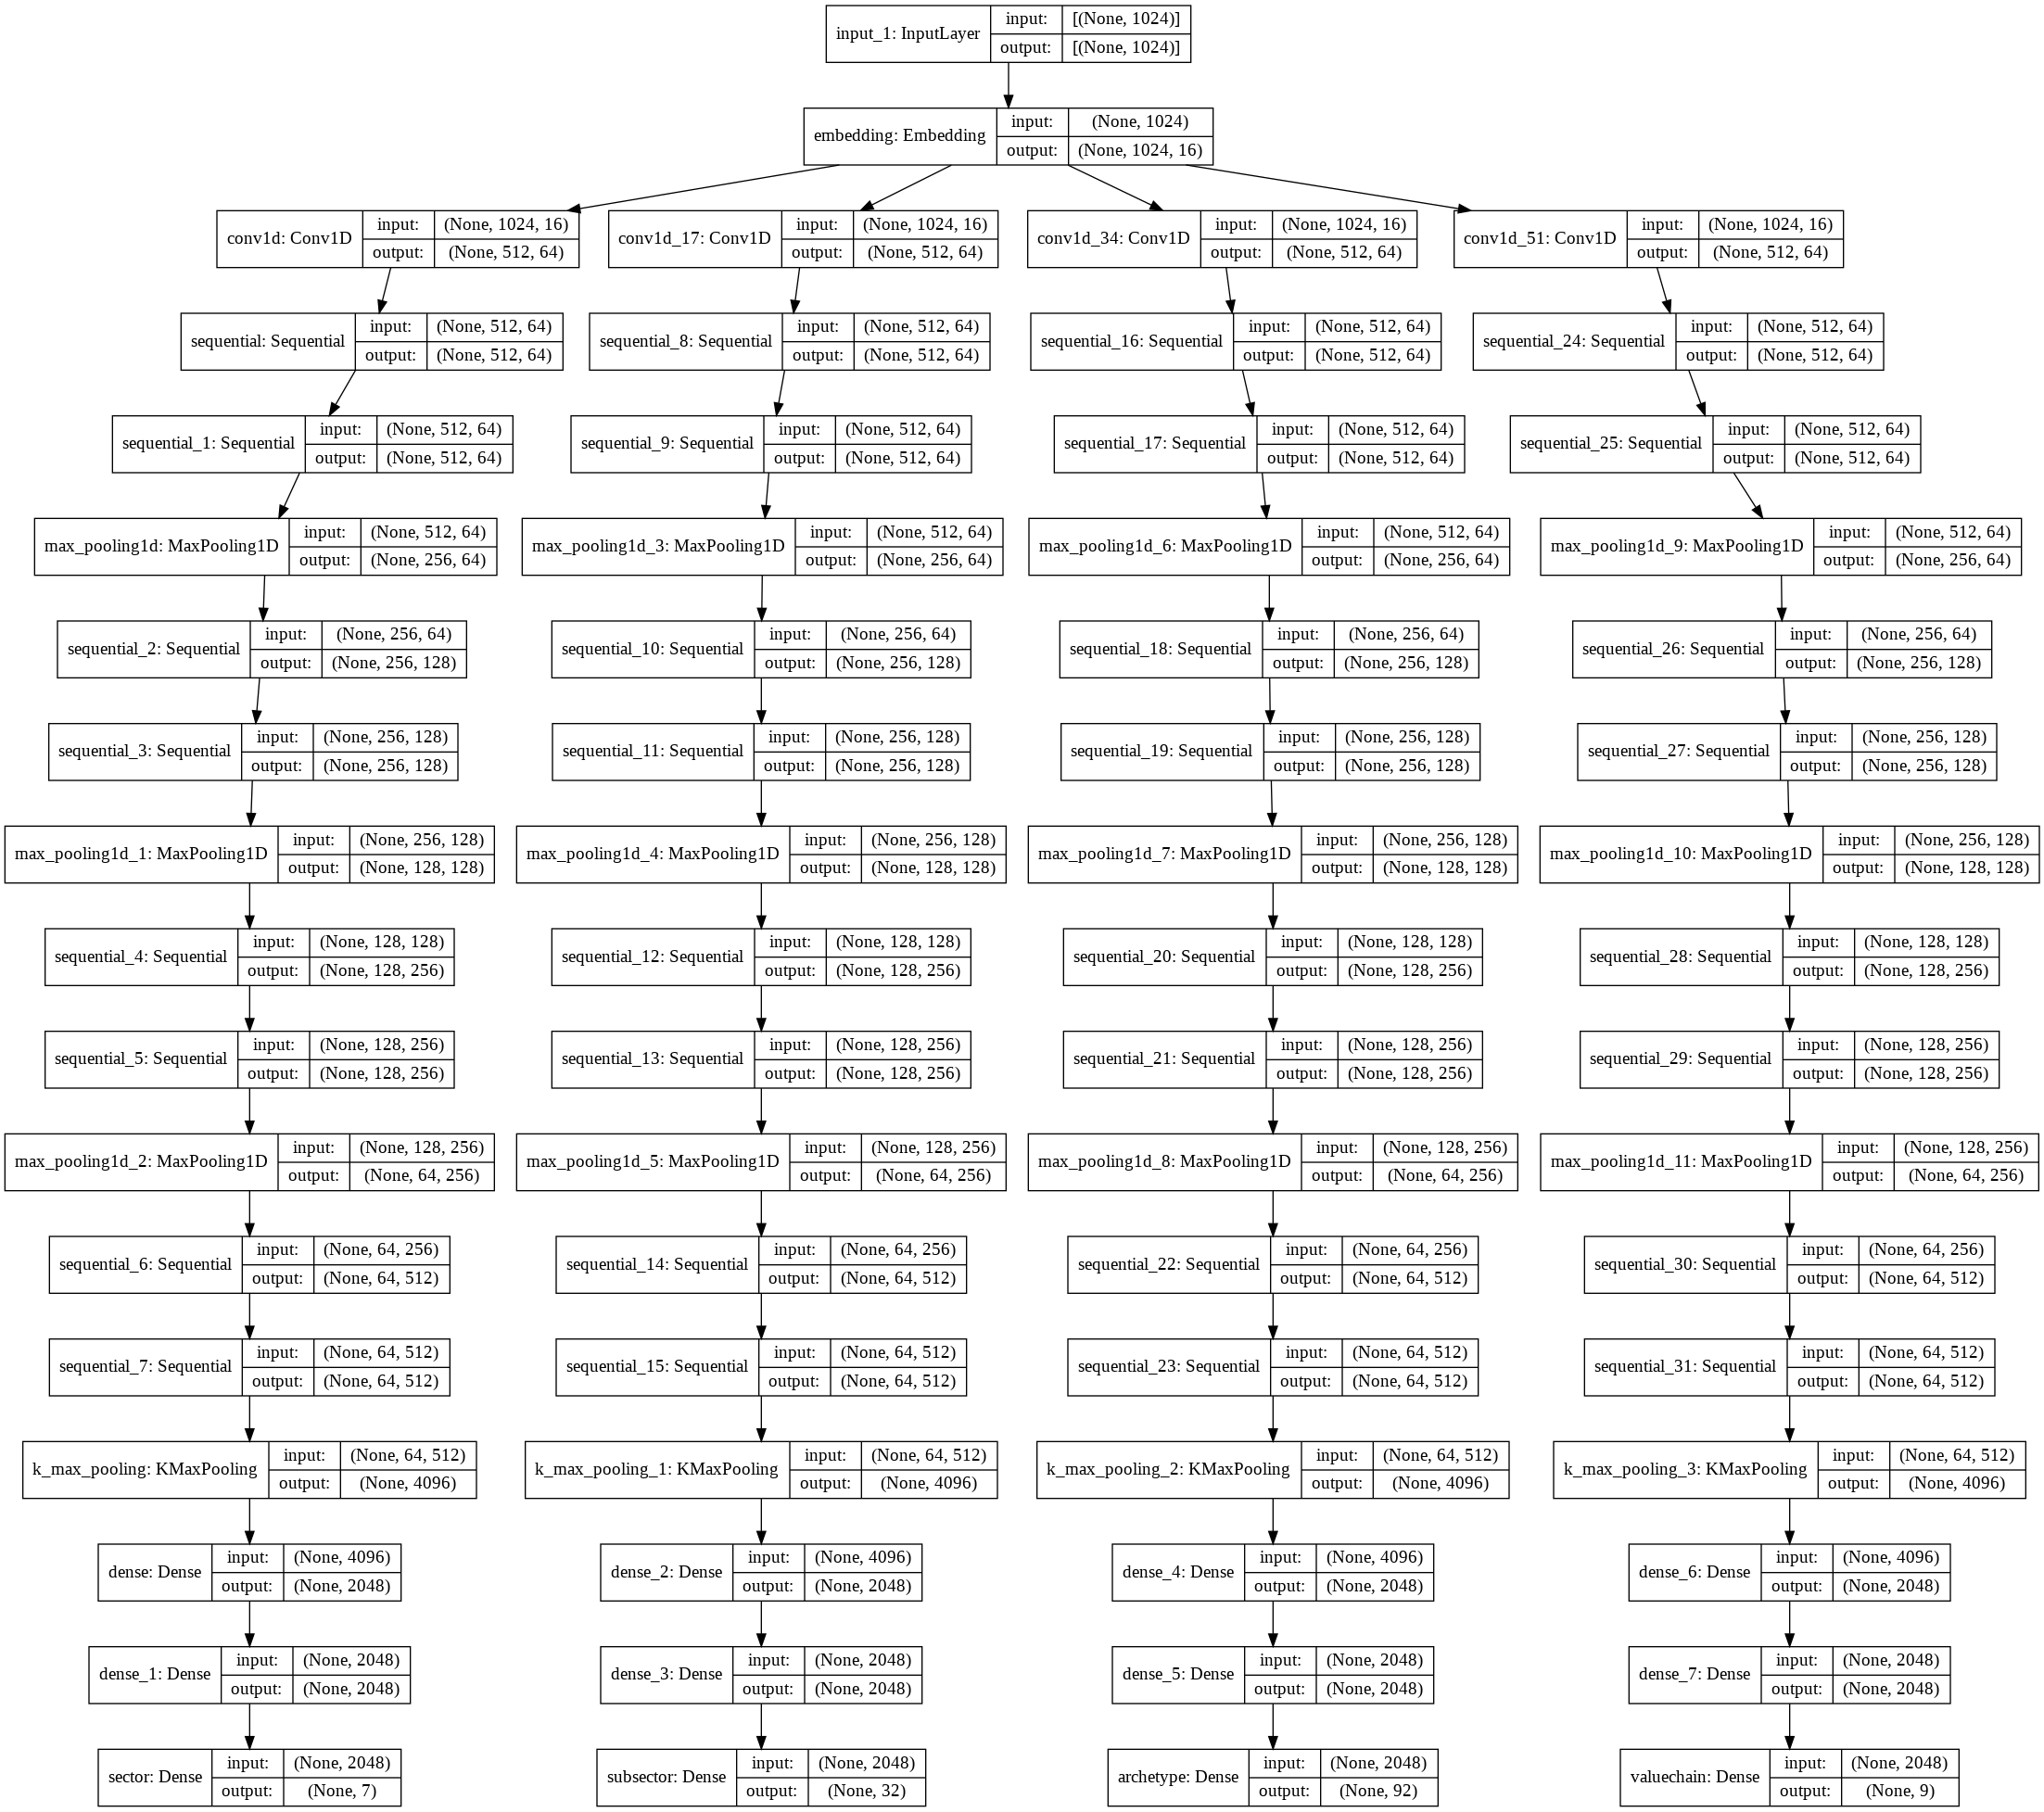

In [49]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [50]:
# now print the summary of the model
model.summary()

Model: "company_classification_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1024)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1024, 16)     1104        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 512, 64)      3136        embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 512, 64)      3136        embedding[0][0]                  
_______________________________________________________________________

In [51]:
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow_addons.metrics import HammingLoss

# as stated in the paper, they use SGD with lr=0.01, momentum=0.9, weight decay=0.001
opt = SGD(lr=0.01, momentum=0.9, decay=0.001)

# # use earlystopping to prevent model overfitting
# es  = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# model training
model.compile(loss=losses, optimizer=opt, metrics=['accuracy', Precision(), Recall(), AUC(name='auc_precision_recall', num_thresholds=10000), HammingLoss(mode='multilabel', threshold=0.6)])
# history = model.fit(X_train, y_train_multi, validation_split=0.2, epochs=200, batch_size=64, callbacks=[es])
history = model.fit(X_train, y_train_multi, validation_split=0.2, epochs=150, batch_size=64)

Epoch 1/150
51/51 [==============================] - 67s 539ms/step - loss: 1.3312 - sector_loss: 0.5769 - subsector_loss: 0.1996 - archetype_loss: 0.1130 - valuechain_loss: 0.4418 - sector_accuracy: 0.2262 - sector_precision: 0.1803 - sector_recall: 0.0519 - sector_auc_precision_recall: 0.5804 - sector_hamming_loss: 0.1602 - subsector_accuracy: 0.1574 - subsector_precision: 0.0435 - subsector_recall: 0.0160 - subsector_auc_precision_recall: 0.6735 - subsector_hamming_loss: 0.0384 - archetype_accuracy: 0.1830 - archetype_precision: 0.0101 - archetype_recall: 0.0185 - archetype_auc_precision_recall: 0.7133 - archetype_hamming_loss: 0.0259 - valuechain_accuracy: 0.3059 - valuechain_precision: 0.2876 - valuechain_recall: 0.1500 - valuechain_auc_precision_recall: 0.7571 - valuechain_hamming_loss: 0.1272 - val_loss: 2.1396 - val_sector_loss: 0.6176 - val_subsector_loss: 0.5213 - val_archetype_loss: 0.5470 - val_valuechain_loss: 0.4537 - val_sector_accuracy: 0.2195 - val_sector_precision: 0.

### 5.2 Testing Models

---

After we train finish, we shall now see the accuracy and loss graph to determine model overfitting and how the model turns out to be like.

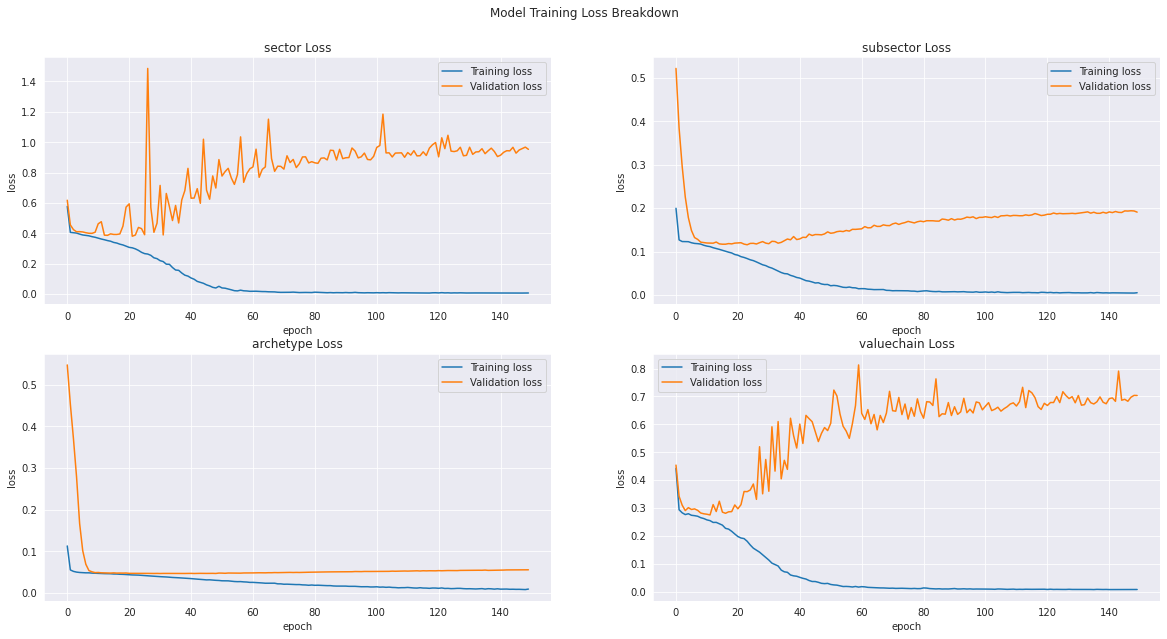

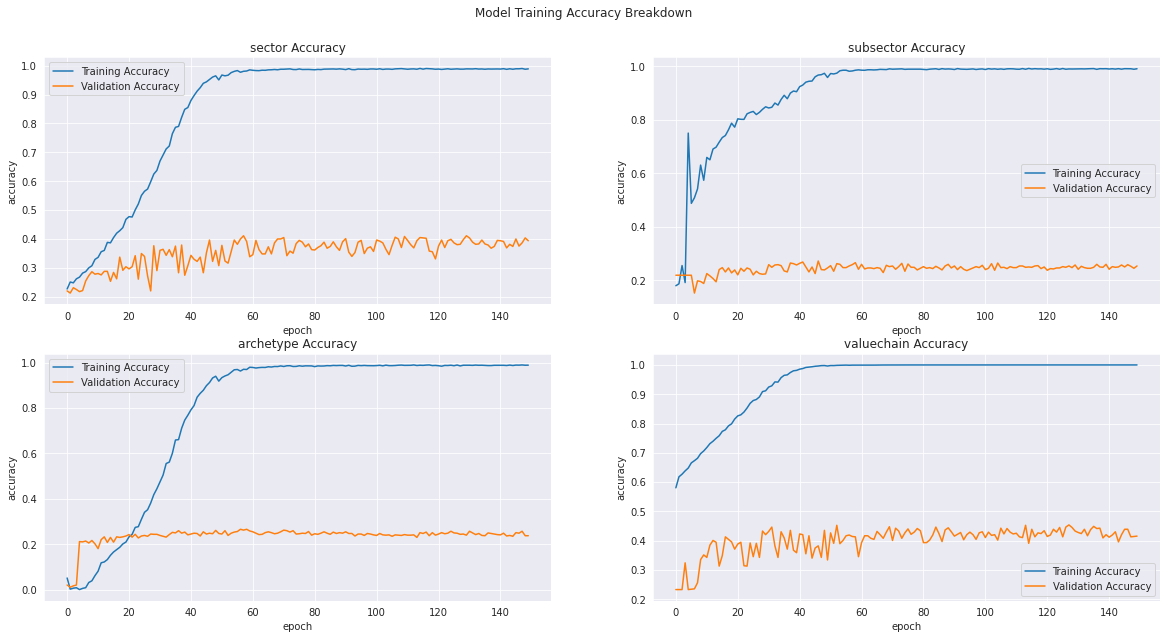

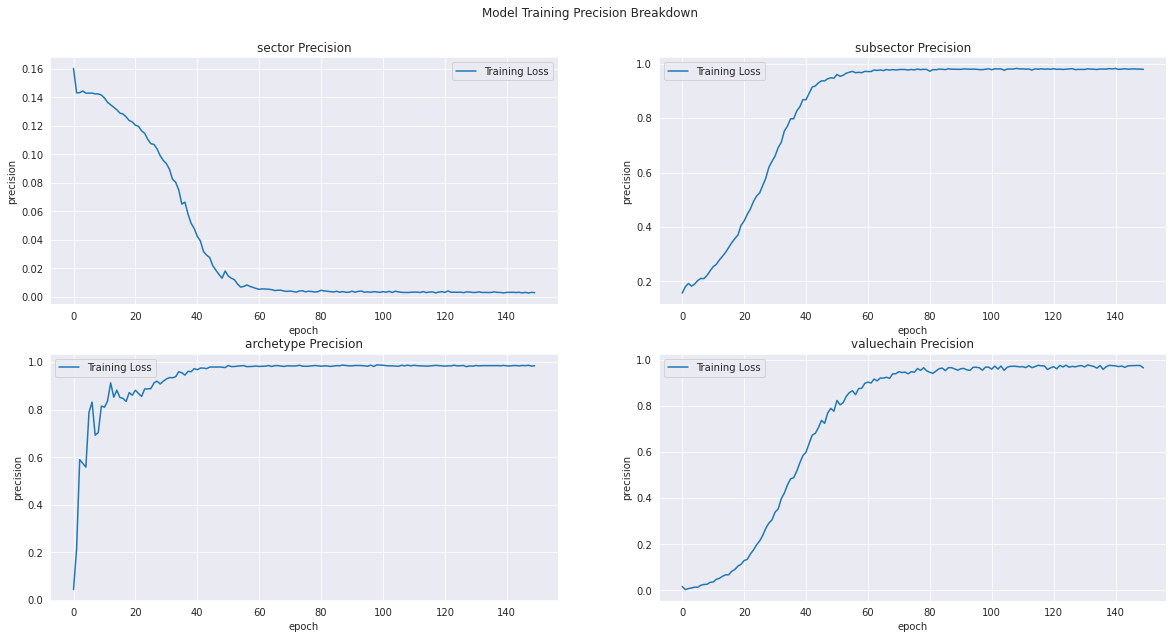

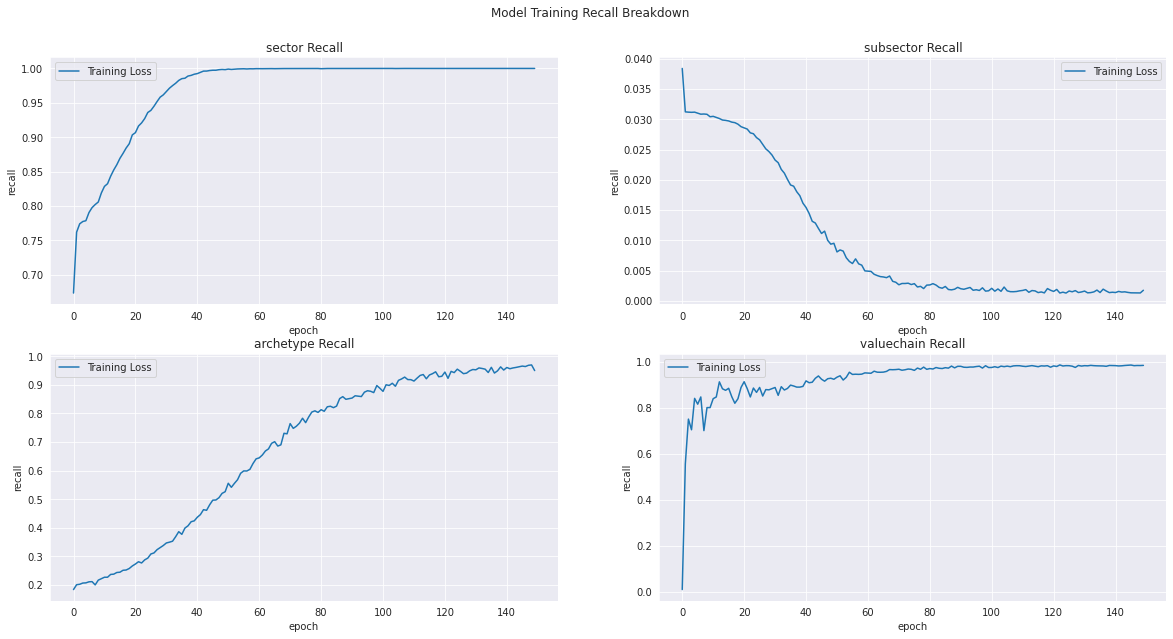

In [52]:
# plot metric graphs for all labels
metric_names = model.metrics_names

fig = plt.figure(1, figsize=(20,10))
plt.suptitle('Model Training Loss Breakdown', y=0.95)
validation_loss = ['val_sector_loss', 'val_subsector_loss', 'val_archetype_loss', 'val_valuechain_loss']

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+1]])
    plt.plot(history.history[validation_loss[i]])
    plt.title(f'{name} Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss', 'Validation loss'])

fig = plt.figure(2, figsize=(20,10))
plt.suptitle('Model Training Accuracy Breakdown', y=0.95)
validation_acc = ['val_sector_accuracy', 'val_subsector_accuracy', 'val_archetype_accuracy', 'val_valuechain_accuracy']

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+5]])
    plt.plot(history.history[validation_acc[i]])
    plt.title(f'{name} Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training Accuracy', 'Validation Accuracy'])

fig = plt.figure(3, figsize=(20,10))
plt.suptitle('Model Training Precision Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+9]])
    plt.title(f'{name} Precision')
    plt.ylabel('precision')
    plt.xlabel('epoch')
    plt.legend(['Training Loss'])

fig = plt.figure(4, figsize=(20,10))
plt.suptitle('Model Training Recall Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+13]])
    plt.title(f'{name} Recall')
    plt.ylabel('recall')
    plt.xlabel('epoch')
    plt.legend(['Training Loss'])

plt.show()

In [53]:
metrics = model.evaluate(X_test, y_test_multi, verbose=0)[1:]

hamming_losses = ['sector_hamming_loss', 'subsector_hamming_loss', 'archetype_hamming_loss', 'valuechain_hamming_loss']

print(f'Label\t\tLoss\tAccuracy\tPrecision\tRecall\tPR AUC\tHamming Loss')
for i, label in enumerate(label_names):
    print(f'{label:<16}{metrics[i]:<8.3f}{metrics[i+4]:<8.3%}\t{metrics[i+8]:<9.3f}\t{metrics[i+12]:<6.3f}\t{metrics[i+16]:<6.3f}\t{metrics[i+20]:6.3f}')

Label		Loss	Accuracy	Precision	Recall	PR AUC	Hamming Loss
sector          1.006   35.920% 	0.142    	0.705 	0.124 	 0.384
subsector       0.199   48.084% 	0.253    	0.030 	0.765 	 0.286
archetype       0.057   30.599% 	0.543    	0.204 	0.010 	 0.720
valuechain      0.821   71.357% 	0.166    	0.549 	0.348 	 0.129


In [54]:
results = model.predict(X_test)

predicted_label = []
for label in results:
    predicted_label.append(np.argmax(label, axis = 1))
predicted_label = np.array(predicted_label)

for i in range(predicted_label.shape[1]):
    print(f'Expected: {y_test[i]} | got {predicted_label[:,i]}')

Expected: [ 2  2 48  5] | got [ 1 24 64  5]
Expected: [ 3 25 70  8] | got [1 6 8 5]
Expected: [ 1  5 13  5] | got [ 1  4 20  3]
Expected: [ 5 26 76  5] | got [ 5 28 46  0]
Expected: [ 1  4 10  5] | got [ 6 24  8  0]
Expected: [ 4 24 64  0] | got [ 6 24 64  0]
Expected: [1 3 9 3] | got [ 4 21 18  3]
Expected: [ 1 31 89  7] | got [ 1 25 10  5]
Expected: [ 4 24 64  0] | got [ 4  3 10  3]
Expected: [2 2 4 5] | got [ 4  3 64  5]
Expected: [0 1 2 3] | got [ 5 25  6  3]
Expected: [ 2 19 82  4] | got [ 6 24 26  3]
Expected: [1 3 9 3] | got [ 6 13 20  0]
Expected: [ 5 26 75  7] | got [ 1  4 64  0]
Expected: [ 4 24 64  0] | got [ 4  8 18  0]
Expected: [ 0 28 18  3] | got [1 4 8 5]
Expected: [ 4 24 64  0] | got [ 4 17 46  3]
Expected: [ 4 24 64  0] | got [ 1  4 64  0]
Expected: [ 5 27 78  3] | got [ 5 28 24  3]
Expected: [ 6 17 46  5] | got [ 4 17 46  3]
Expected: [ 4 24 64  0] | got [ 4 11 10  0]
Expected: [ 0 28 34  3] | got [ 2 25 69  5]
Expected: [ 4 24 64  0] | got [ 1  3 20  5]
Expected: [2

---
---

# 6.Saving Models
---
We will define how we save our pretrained model so that we can fit it into our engine.

### 6.1 Using `model.save`

---

Save the model and zip it.

In [ ]:
# save models to file
for i in range(4):
    models[i].save(f'./model_{i+1}')

INFO:tensorflow:Assets written to: ./model_1/assets
INFO:tensorflow:Assets written to: ./model_2/assets
INFO:tensorflow:Assets written to: ./model_3/assets
INFO:tensorflow:Assets written to: ./model_4/assets


In [ ]:
!zip -r model_4.zip ./model_4

  adding: model_4/ (stored 0%)
  adding: model_4/saved_model.pb (deflated 89%)
  adding: model_4/variables/ (stored 0%)
  adding: model_4/variables/variables.index (deflated 66%)
  adding: model_4/variables/variables.data-00000-of-00001 (deflated 43%)
  adding: model_4/assets/ (stored 0%)


---
---

# 7.References


## Linking GitHub Private Repo with Google Colab
---
1. [How to clone private Github repo from Google Colab using SSH](https://medium.com/@purba0101/how-to-clone-private-github-repo-in-google-colab-using-ssh-77384cfef18f)
2. [Adding a new SSH key to your GitHub account](https://docs.github.com/en/github/authenticating-to-github/adding-a-new-ssh-key-to-your-github-account)


## How to classify text with NLTK
---
1. [Learning to Classify Text](https://www.nltk.org/book/ch06.html)


## Other references
---
1. [Print very long string completely in pandas dataframe](https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
2. [Removing newlines from messy strings in pandas dataframe cells?
](https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells)
3. [Tokenizing using Pandas and spaCy](https://stackoverflow.com/questions/46981137/tokenizing-using-pandas-and-spacy)
4. [Intro to NLP with spaCy](https://nicschrading.com/project/Intro-to-NLP-with-spaCy/)
5. [A short introduction to NLP in Python with spaCy](https://towardsdatascience.com/a-short-introduction-to-nlp-in-python-with-spacy-d0aa819af3ad)
6. [Punctuation, stopwords and lemmatization with spacy](https://stackoverflow.com/questions/57747613/punctuation-stopwords-and-lemmatization-with-spacy)

